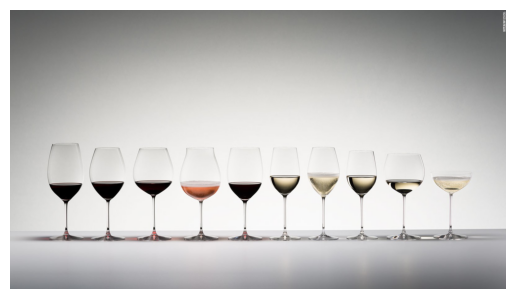

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'C:/Users/user/Downloads/wq.jpg'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()


# Задание: Прогнозирование качества вин
## Вы будете работать с набором данных о качестве вин, который содержит характеристики различных вин и оценки их качества. Ваша задача — создать модель, которая будет предсказывать качество вина на основе его свойств. Используйте библиотеки Pandas, NumPy и scikit-learn.
### Шаги выполнения задания:
1. Загрузка и предварительная обработка данных:
2. Загрузите уникальный набор данных о качестве вин, например, Wine Quality Data Set с сайта UCI Machine Learning Repository.
3. Проведите исследовательский анализ данных: изучите распределение значений, найдите и обработайте пропуски и выбросы. Нормализуйте данные, если это необходимо.
4. Разработка модели:
* Используйте метод передачи через нейронную сеть (например, Feedforward Neural Network) для предсказания качества вина. Опишите, как вы реализуете обучение с помощью градиентного спуска и какие функции активации будете использовать.
* Обучите модель на подготовленных данных и оцените её эффективность, используя метрики, такие как R2 (коэффициент детерминации) и MAE (Mean Absolute Error).
* Отчет и визуализация:
5. Подготовьте отчет с описанием всех этапов работы, включая код и графики. Используйте Matplotlib или Seaborn для визуализации результатов.
6. Включите график, который показывает зависимость предсказанных оценок от истинных значений, и обсудите, какие выводы можно сделать на основе этой визуализации. Также, предложите улучшения для вашей модели.


# Коротко о датасете:
* Включены два набора данных, относящихся к образцам красного и белого вина винью верде с севера Португалии. Цель — моделирование качества вина на основе физико-химических тестов.
* Два набора данных относятся к красным и белым вариантам португальского вина «Винью Верде». Подробнее см. на сайте: http://www.vinhoverde.pt/en/ или в [Cortez et al., 2009]. В связи с конфиденциальностью и логистическими проблемами доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, отсутствуют данные о сортах винограда, марке вина, цене продажи вина и т. д.). Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин гораздо больше, чем отличных или плохих). Для выявления немногих отличных или плохих вин можно использовать алгоритмы обнаружения выбросов. Кроме того, мы не уверены, что все входные переменные релевантны. Поэтому было бы интересно протестировать методы отбора признаков.
* Входные переменные (основаны на физико-химических исследованиях):
* 1 – фиксированная кислотность;
* 2 – летучая кислотность;
* 3 – лимонная кислота;
* 4 – остаточный сахар;
* 5 – хлориды;
* 6 – свободный диоксид серы;
* 7 – общий диоксид серы;
* 8 – плотность;
* 9 – pH;
* 10 – сульфаты;
* 11 – спирт. 
* 12 – Выходная переменная (основана на сенсорных данных): качество (оценка от 0 до 10).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [3]:
# Загрузка данных
red_wine = pd.read_csv('C:/Users/user/Downloads/wine+quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('C:/Users/user/Downloads/wine+quality/winequality-white.csv', sep=';')

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
red_wine.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
red_wine.duplicated().sum()

240

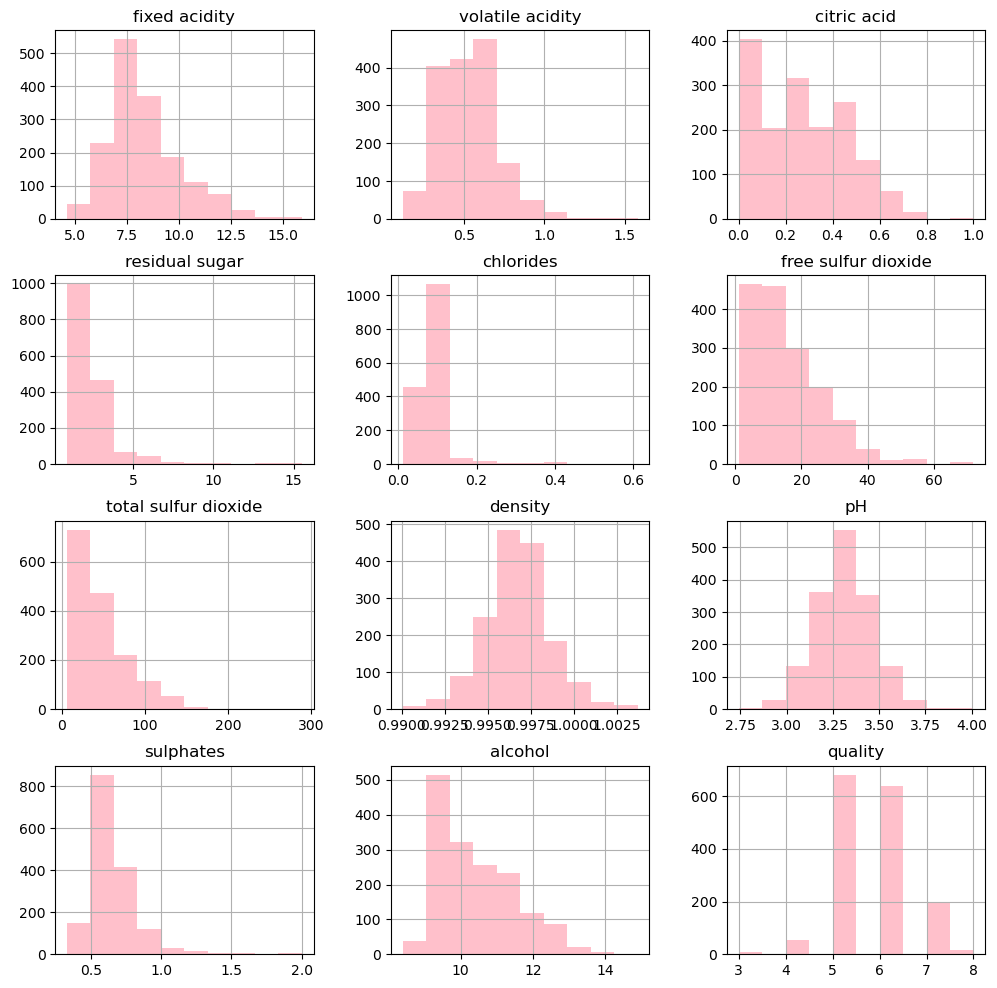

In [10]:
red_wine.hist(color='pink',figsize=(12,12));

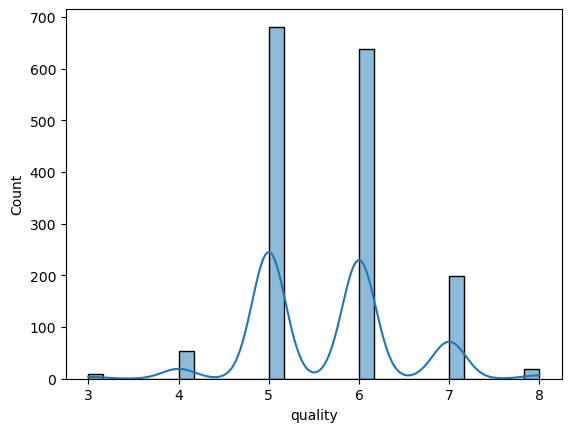

In [11]:
# Таргет
sns.histplot(red_wine['quality'], kde=True)
plt.show()

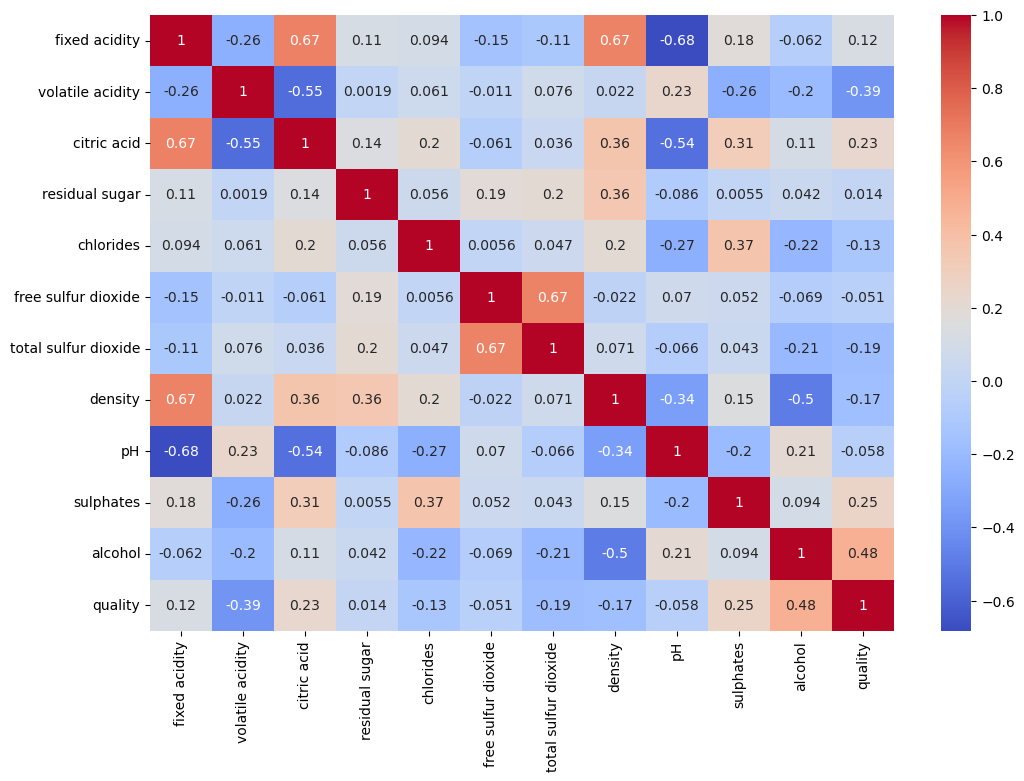

In [12]:
# Матрица корреляции
correlation_matrix = red_wine.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [15]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
white_wine.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [18]:
white_wine.duplicated().sum()

937

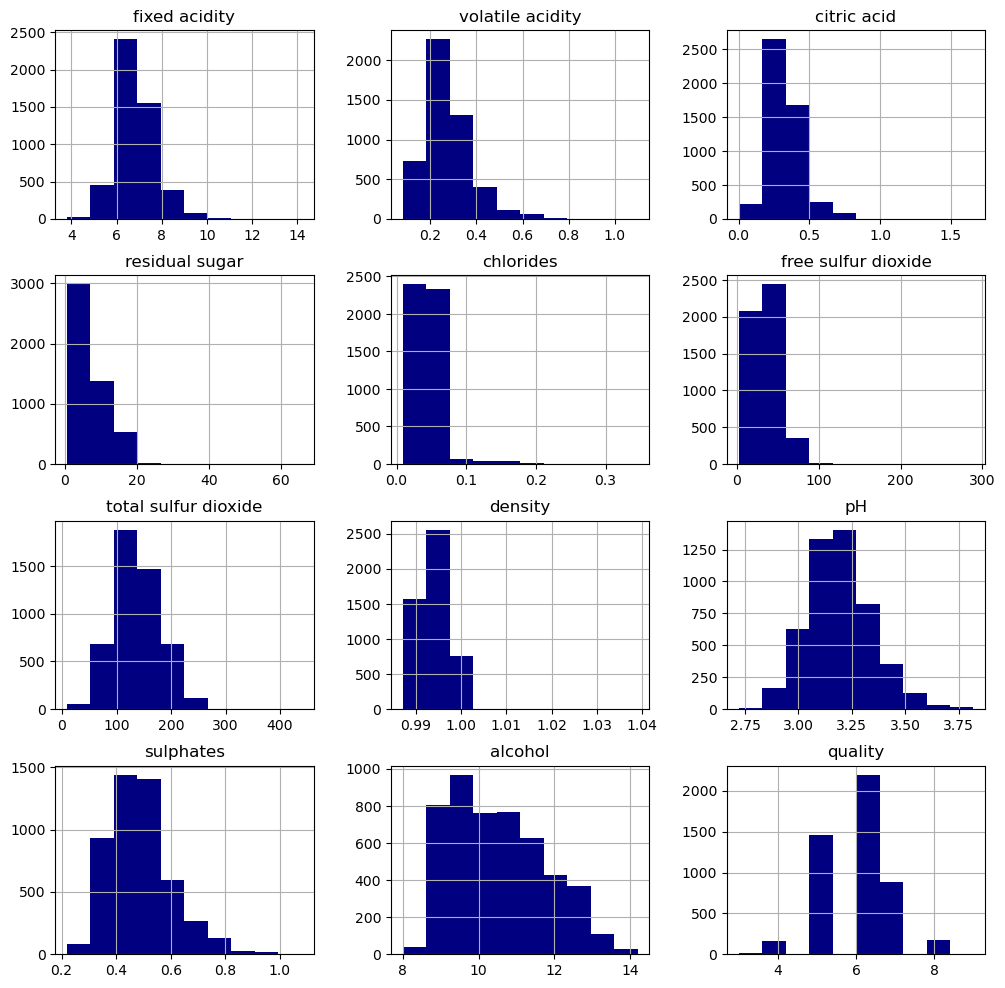

In [19]:
white_wine.hist(color='navy',figsize=(12,12));

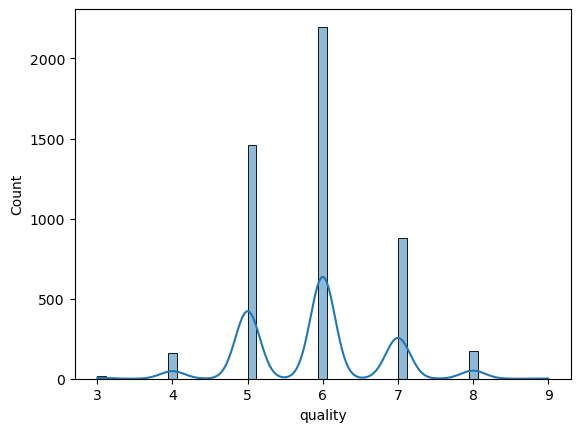

In [20]:
# Таргет
sns.histplot(white_wine['quality'], kde=True)
plt.show()

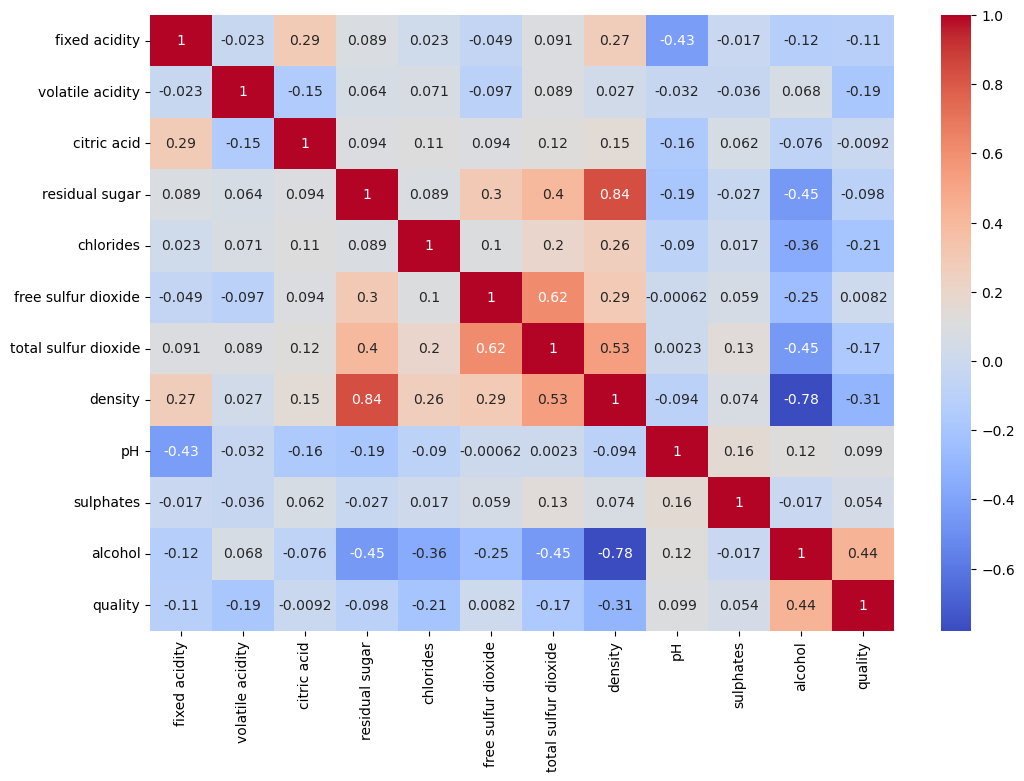

In [21]:
# Матрица корреляции
correlation_matrix = white_wine.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
def remove_outliers_iqr(df, columns):
    initial_length = len(df)
    indices_to_keep = []
    for index in df.index:
        is_outlier = False
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            if not (lower_bound <= df.loc[index, col] <= upper_bound):
                is_outlier = True
                break
        if not is_outlier:
            indices_to_keep.append(index)

    cleaned_df = df.loc[indices_to_keep].copy()
    print(f"Удалено {initial_length - len(cleaned_df)} строк с выбросами (IQR)")
    return cleaned_df

In [23]:
# Определение числовых колонок
numerical_cols = red_wine.select_dtypes(include=np.number).columns.tolist()

In [24]:
# Удаление выбросов ДЛЯ КРАСНОГО ВИНА
red_wine_cleaned = remove_outliers_iqr(red_wine, numerical_cols)
print(f"Размер red_wine до: {len(red_wine)}")
print(f"Размер red_wine после удаления выбросов: {len(red_wine_cleaned)}")

Удалено 420 строк с выбросами (IQR)
Размер red_wine до: 1599
Размер red_wine после удаления выбросов: 1179


In [25]:
# Удаление выбросов ДЛЯ БЕЛОГО ВИНА
numerical_cols = white_wine.select_dtypes(include=np.number).columns.tolist()
white_wine_cleaned = remove_outliers_iqr(white_wine, numerical_cols)
print(f"Размер white_wine до: {len(white_wine)}")
print(f"Размер white_wine после удаления выбросов: {len(white_wine_cleaned)}")

Удалено 1040 строк с выбросами (IQR)
Размер white_wine до: 4898
Размер white_wine после удаления выбросов: 3858


# Первоначальные выводы:
1. В датасете два типа вин: красное и белое. белых вин больше - 4898 против 1599 красных.
2. Пропусков нет.
3. Имеются дубликаты, 240 в красном вине и 937 в белом.
4. У белого вина присутствует корреляция между плотностью и остаточным сахаром (0.84).
5. У красного вина есть коррляция между плотностью и кислотностью (0.67).
6. Считаю, что два детесета нужно объединить, в один, но, сохранить информацию и том, какого цвета вино. Для этого создадим столбец color. В нем будут два значения - red и white.
7. Возможно придется создать новые признаки
8. Удалил выбросы сразу. (до этого поэксперементировал с ними в черновике, это самый оптимальный вариант)
9. Нужно создать несколько новых фичей на основе имеющихся

In [26]:
color_red = np.repeat('red', len(red_wine_cleaned), axis=None)

In [27]:
color_white = np.repeat('white', len(white_wine_cleaned), axis=None)

In [28]:
red_wine_cleaned['color'] = color_red
red_wine_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [29]:
white_wine_cleaned['color'] = color_white
white_wine_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [30]:
wines = pd.concat([red_wine_cleaned, white_wine_cleaned])

In [31]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [32]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [33]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5037 non-null   float64
 1   volatile acidity      5037 non-null   float64
 2   citric acid           5037 non-null   float64
 3   residual sugar        5037 non-null   float64
 4   chlorides             5037 non-null   float64
 5   free sulfur dioxide   5037 non-null   float64
 6   total sulfur dioxide  5037 non-null   float64
 7   density               5037 non-null   float64
 8   pH                    5037 non-null   float64
 9   sulphates             5037 non-null   float64
 10  alcohol               5037 non-null   float64
 11  quality               5037 non-null   int64  
 12  color                 5037 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 550.9+ KB


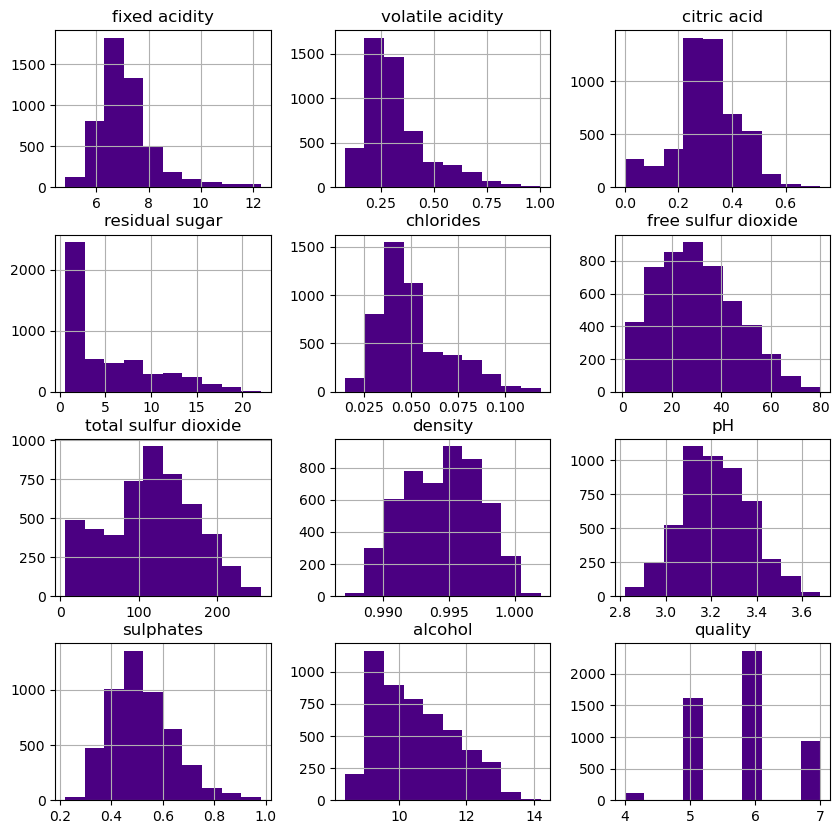

In [34]:
wines.hist(color='indigo',figsize=(10,10));

# Создание новых признаков
1. Признаки кислотности:
ratio_fixed_volatile: Fixed Acidity / Volatile Acidity - Отношение общей и летучей кислотности. Может указать на баланс кислотности.
ratio_citric_fixed: Citric Acid / Fixed Acidity - Отношение лимонной и общей кислотности. Может показать вклад лимонной кислоты в общую кислотность.
ratio_citric_volatile: Citric Acid / Volatile Acidity - Отношение лимонной и летучей кислотности.
2. Признаки серы:
ratio_free_total_sulfur: Free Sulfur Dioxide / Total Sulfur Dioxide - Отношение свободного диоксида серы к общему. Важно для понимания консервации вина и его стабильности.
3. Признаки кислотности и pH:
acidity_pH_interaction: (Fixed Acidity + Volatile Acidity + Citric Acid) * pH - Взаимодействие общей кислотности и pH. Может указать на восприятие кислотности.
4. Признаки сахара и алкоголя:
sugar_alcohol_interaction: Residual Sugar * Alcohol - Взаимодействие остаточного сахара и алкоголя. Важно для определения сладости и крепкости вина.

7. Признак сульфатов к плотности:
sulphates_density_ratio: Sulphates / Density - Связь сульфатов и плотности.

In [35]:
# Создание новых признаков
wines['ratio_fixed_volatile'] = wines['fixed acidity'] / wines['volatile acidity']
wines['ratio_citric_fixed'] = wines['citric acid'] / wines['fixed acidity']
wines['ratio_citric_volatile'] = wines['citric acid'] / wines['volatile acidity']
wines['ratio_free_total_sulfur'] = wines['free sulfur dioxide'] / wines['total sulfur dioxide']
wines['acidity_pH_interaction'] = (wines['fixed acidity'] + wines['volatile acidity'] + wines['citric acid']) * wines['pH']
wines['sugar_alcohol_interaction'] = wines['residual sugar'] * wines['alcohol']
wines['sulphates_density_ratio'] = wines['sulphates'] / wines['density']

# Обработка деления на ноль (замена на 0 или другое значение)
wines.replace([np.inf, -np.inf], 0, inplace=True) # Важно!

# Вывод первых строк с новыми признаками
print(wines.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  ratio_fixed_volatile  ratio_citric_fixed  \
0      9.4     

In [36]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,ratio_fixed_volatile,ratio_citric_fixed,ratio_citric_volatile,ratio_free_total_sulfur,acidity_pH_interaction,sugar_alcohol_interaction,sulphates_density_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,10.571429,0.000000,0.000000,0.323529,28.4310,17.86,0.561235
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,8.863636,0.000000,0.000000,0.373134,27.7760,25.48,0.682183
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,10.263158,0.005128,0.052632,0.277778,28.0360,22.54,0.651956
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,40.000000,0.050000,2.000000,0.283333,38.0464,18.62,0.581162
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,10.571429,0.000000,0.000000,0.323529,28.4310,17.86,0.561235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,29.523810,0.046774,1.380952,0.260870,21.9090,17.92,0.504470
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,20.625000,0.054545,1.125000,0.339286,22.9320,76.80,0.462358
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,27.083333,0.029231,0.791667,0.270270,20.7207,11.28,0.463457
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,18.965517,0.054545,1.034483,0.181818,20.3406,14.08,0.384347


plt.figure(figsize=(12,8))
for i, col in enumerate(wines.columns[:-1]):
    plt.subplot(4, 4, i+1)
    wines.boxplot(column=col)
plt.tight_layout()
plt.show()

# Создание и обучение модели

In [37]:
def r2_score_keras(y_true, y_pred):
    """
    Коэффициент детерминации R^2, реализованный для Keras backend
    """
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [38]:
categorical_cols = ['color']

In [39]:
# Разделение на признаки и таргет
X = wines.drop('quality', axis=1)
y = wines['quality']

In [40]:
# 2. Преобразование меток классов
le = LabelEncoder()
y = le.fit_transform(y)

In [41]:
num_classes = len(np.unique(y))  # Количество уникальных классов в целевой переменной
print(f"Количество классов: {num_classes}")

Количество классов: 4


In [42]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,ratio_fixed_volatile,ratio_citric_fixed,ratio_citric_volatile,ratio_free_total_sulfur,acidity_pH_interaction,sugar_alcohol_interaction,sulphates_density_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,10.571429,0.000000,0.000000,0.323529,28.4310,17.86,0.561235
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,8.863636,0.000000,0.000000,0.373134,27.7760,25.48,0.682183
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,10.263158,0.005128,0.052632,0.277778,28.0360,22.54,0.651956
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,40.000000,0.050000,2.000000,0.283333,38.0464,18.62,0.581162
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,10.571429,0.000000,0.000000,0.323529,28.4310,17.86,0.561235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,29.523810,0.046774,1.380952,0.260870,21.9090,17.92,0.504470
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,20.625000,0.054545,1.125000,0.339286,22.9320,76.80,0.462358
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,27.083333,0.029231,0.791667,0.270270,20.7207,11.28,0.463457
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,18.965517,0.054545,1.034483,0.181818,20.3406,14.08,0.384347


In [43]:
numerical_cols = X.columns.drop(categorical_cols)

In [51]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [53]:
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]

In [54]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numerical)
X_test_scaled = scaler.transform(X_test_numerical)

In [55]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1)  # Один нейрон для регрессии (без softmax)
])

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', r2_score_keras])

In [57]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [58]:
history = model.fit(X_train_scaled, y_train, epochs=2000, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=0)

In [59]:
y_pred = model.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [60]:
# Метрики
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Используем sklearn для финальной оценки

print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

MAE: 0.469
R²: 0.320


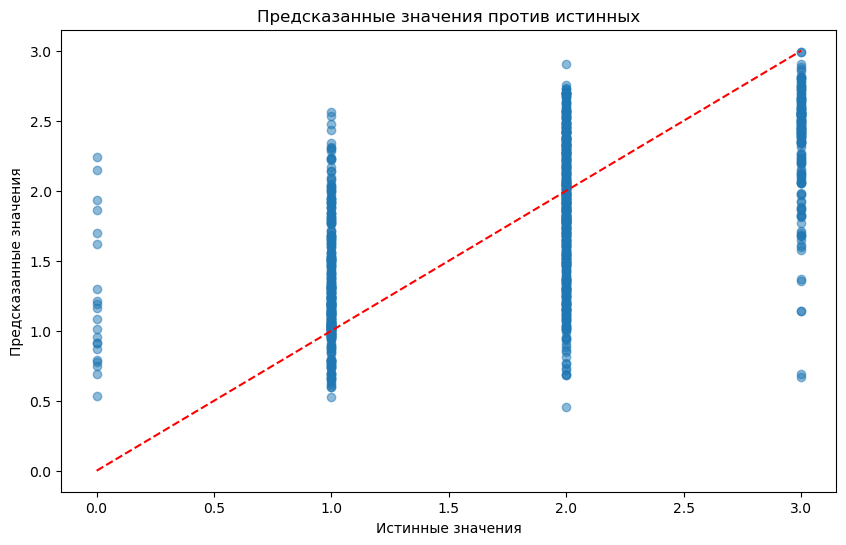

In [61]:
# График предсказанных значений против истинных
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Линия y=x
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения против истинных')
plt.show()

# Другие модели (для сравнения)

In [62]:
# Обучение RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10000, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10000, random_state=42)

In [63]:
# Обучение GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(n_estimators=10000, random_state=42)

In [64]:
# Обучение KNeighborsRegressor (K-NN)
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [65]:
# Обучение Support Vector Machine (SVM)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVR()

In [66]:
# Обучение модели MLPRegressor
mlpr_model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=10000, random_state=42)
mlpr_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=10000, random_state=42)

In [67]:
# Обучение модели MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=10000, random_state=42) # Сохраняем параметры как раньше
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=10000, random_state=42)

In [68]:
# Оценка моделей
def evaluate_model(model, X_test, y_test):
    """Оценивает модель регрессии и выводит MAE и R²."""
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    return mae, r2

print("\nRandomForestRegressor:")
rf_mae, rf_r2 = evaluate_model(rf_model, X_test_scaled, y_test)

print("\nGradientBoostingRegressor:")
gb_mae, gb_r2 = evaluate_model(gb_model, X_test_scaled, y_test)

print("\nKNeighborsRegressor:")
knn_mae, knn_r2 = evaluate_model(knn_model, X_test_scaled, y_test)

print("\nSupport Vector Machine (SVM):")
svm_mae, svm_r2 = evaluate_model(svm_model, X_test_scaled, y_test)

print("\nMLPRegressor:")
mlpr_mae, mlpr_r2 = evaluate_model(mlpr_model, X_test_scaled, y_test)

print("\nMLPClassifier:")
mlp_mae, mlp_r2 = evaluate_model(mlp_model, X_test_scaled, y_test)


RandomForestRegressor:
MAE: 0.3832
R²: 0.5043

GradientBoostingRegressor:
MAE: 0.3805
R²: 0.3936

KNeighborsRegressor:
MAE: 0.4596
R²: 0.3308

Support Vector Machine (SVM):
MAE: 0.4505
R²: 0.3517

MLPRegressor:
MAE: 0.4854
R²: 0.1678

MLPClassifier:
MAE: 0.4127
R²: 0.1090


In [69]:
print("\nСравнение моделей:")
best_model = min(
    [(rf_mae, "RandomForestRegressor"), (gb_mae, "GradientBoostingRegressor"),
     (knn_mae, "KNeighborsRegressor"), (svm_mae, "Support Vector Machine (SVM)"), (mlpr_mae, "MLPRegressor"),(mlp_mae, "MLPClassifier")])[1]
print(f"Лучшая модель (по MAE): {best_model}")


Сравнение моделей:
Лучшая модель (по MAE): GradientBoostingRegressor


In [70]:
print("\nСравнение моделей:")
best_model = max(
    [(rf_r2, "RandomForestRegressor"), (gb_r2, "GradientBoostingRegressor"),
     (knn_r2, "KNeighborsRegressor"), (svm_r2, "Support Vector Machine (SVM)"), (mlpr_r2, "MLPRegressor"),(mlp_r2, "MLPClassifier")])[1]
print(f"Лучшая модель (по r2): {best_model}")


Сравнение моделей:
Лучшая модель (по r2): RandomForestRegressor


# Выводы:
1. Произвел предобработку данных
2. Создал новые фичи (7 штук)
3. Удалил выбросы
4. Объединил два датасета
5. Создал модель нейронной сети из 5 слоев
6. Дополнительно создал еще 6 моделей (и модель случайного леса показала результаты лучше, чем нейронная сеть)
7. Получил метрики MAE и r2
    * MAE: 0.469
    * R²: 0.320
8. MAE показывает среднюю абсолютную разницу между предсказанными значениями и фактическими значениями качества вина. В данном случае, MAE 0.469 означает, что в среднем ваша модель ошибается примерно на 0.469 единицы по шкале качества вина.
Поскольку шкала качества вина обычно находится в диапазоне от 3 до 8 ошибка в 0.469 может быть приемлемой, но это зависит от того, насколько важна точность в вашей задаче.
Например, если вам нужно очень точно предсказывать качество вина, то MAE 0.469 может быть слишком высоким. Если же вам нужно лишь приблизительное предсказание, то это может быть достаточно хорошо.
9. R² (коэффициент детерминации) показывает, какая доля дисперсии целевой переменной (качества вина) объясняется вашей моделью. Значение 0.320 означает, что ваша модель объясняет 32% изменчивости в качестве вина.
R² находится в диапазоне от 0 до 1, где 1 означает, что модель идеально объясняет все колебания целевой переменной. Значение 0.320 говорит о том, что у вашей модели есть потенциал для улучшения. 32% - это не очень высокий результат, и это значит, что есть много неучтенных факторов, влияющих на качество вина, которые ваша модель не захватывает.
10. Регрессия предполагает непрерывную целевую величину, поэтому, если таргет является порядковой переменной как у нас(оценки качества вина от 1 до 10), более подходящими может быть классификация.